In [126]:
import pandas as pd
import random
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
sources= pd.read_csv('sources.csv') 
sources

,id,display_name,url,country,month,baseline_count,uyghur_count
0,69186,Afghan Online Press,http://www.aopnews.com/,Afghanistan,2017-01-01,2,0
1,59652,The Kabul Times,https://www.thekabultimes.gov.af,Afghanistan,2017-01-01,0,0
2,34027,Afghanistan Times,http://www.afghanistantimes.af,Afghanistan,2017-01-01,0,0
3,154955,Tolo News,https://tolonews.com,Afghanistan,2017-01-01,0,0
4,167540,Bakhtar News Agency,https://bakhtarnews.af,Afghanistan,2017-01-01,0,0
...,...,...,...,...,...,...,...
11725,146589,Mbare Times,https://mbaretimes.com,Zimbabwe,2020-11-01,648,0
11726,146589,Mbare Times,https://mbaretimes.com,Zimbabwe,2020-12-01,609,0
11727,146589,Mbare Times,https://mbaretimes.com,Zimbabwe,2021-01-01,555,0
11728,146589,Mbare Times,https://mbaretimes.com,Zimbabwe,2021-02-01,1058,1


In [128]:
#DATA EXPLORATION 

In [129]:
#HEATMAP OF COUNTRIES' MENTIONS OVER TIME (DATA CLEANING) 
#Group by country, sum media mentions over time 

In [130]:
sources['month'] = pd.to_datetime(sources['month'], format="%Y-%d-%m") 
sources['year']= sources['month'].dt.year

In [131]:
country_overtime = sources.drop(columns=["id","display_name", "url", "month"])
country_overtime

,country,baseline_count,uyghur_count,year
0,Afghanistan,2,0,2017
1,Afghanistan,0,0,2017
2,Afghanistan,0,0,2017
3,Afghanistan,0,0,2017
4,Afghanistan,0,0,2017
...,...,...,...,...
11725,Zimbabwe,648,0,2020
11726,Zimbabwe,609,0,2020
11727,Zimbabwe,555,0,2021
11728,Zimbabwe,1058,1,2021


In [132]:
by_country_overtime = country_overtime.groupby(["year", "country"]).sum()
by_country_overtime

#HEATMAP OF COUNTRIES' MENTIONS OVER TIME (VISUALIZATION: HEATMAP)

baseline_count  uyghur_count
year country                                     
2017 Afghanistan                 20             0
     Albania                   1983             0
     Algeria                    406             0
     Angola                       0             0
     Argentina                    0             0
...                             ...           ...
2021 Viet Nam                  3218             0
     Western Sahara             138             0
     Yemen                       77             0
     Zambia                    1790             1
     Zimbabwe                  2714             1

[675 rows x 2 columns]

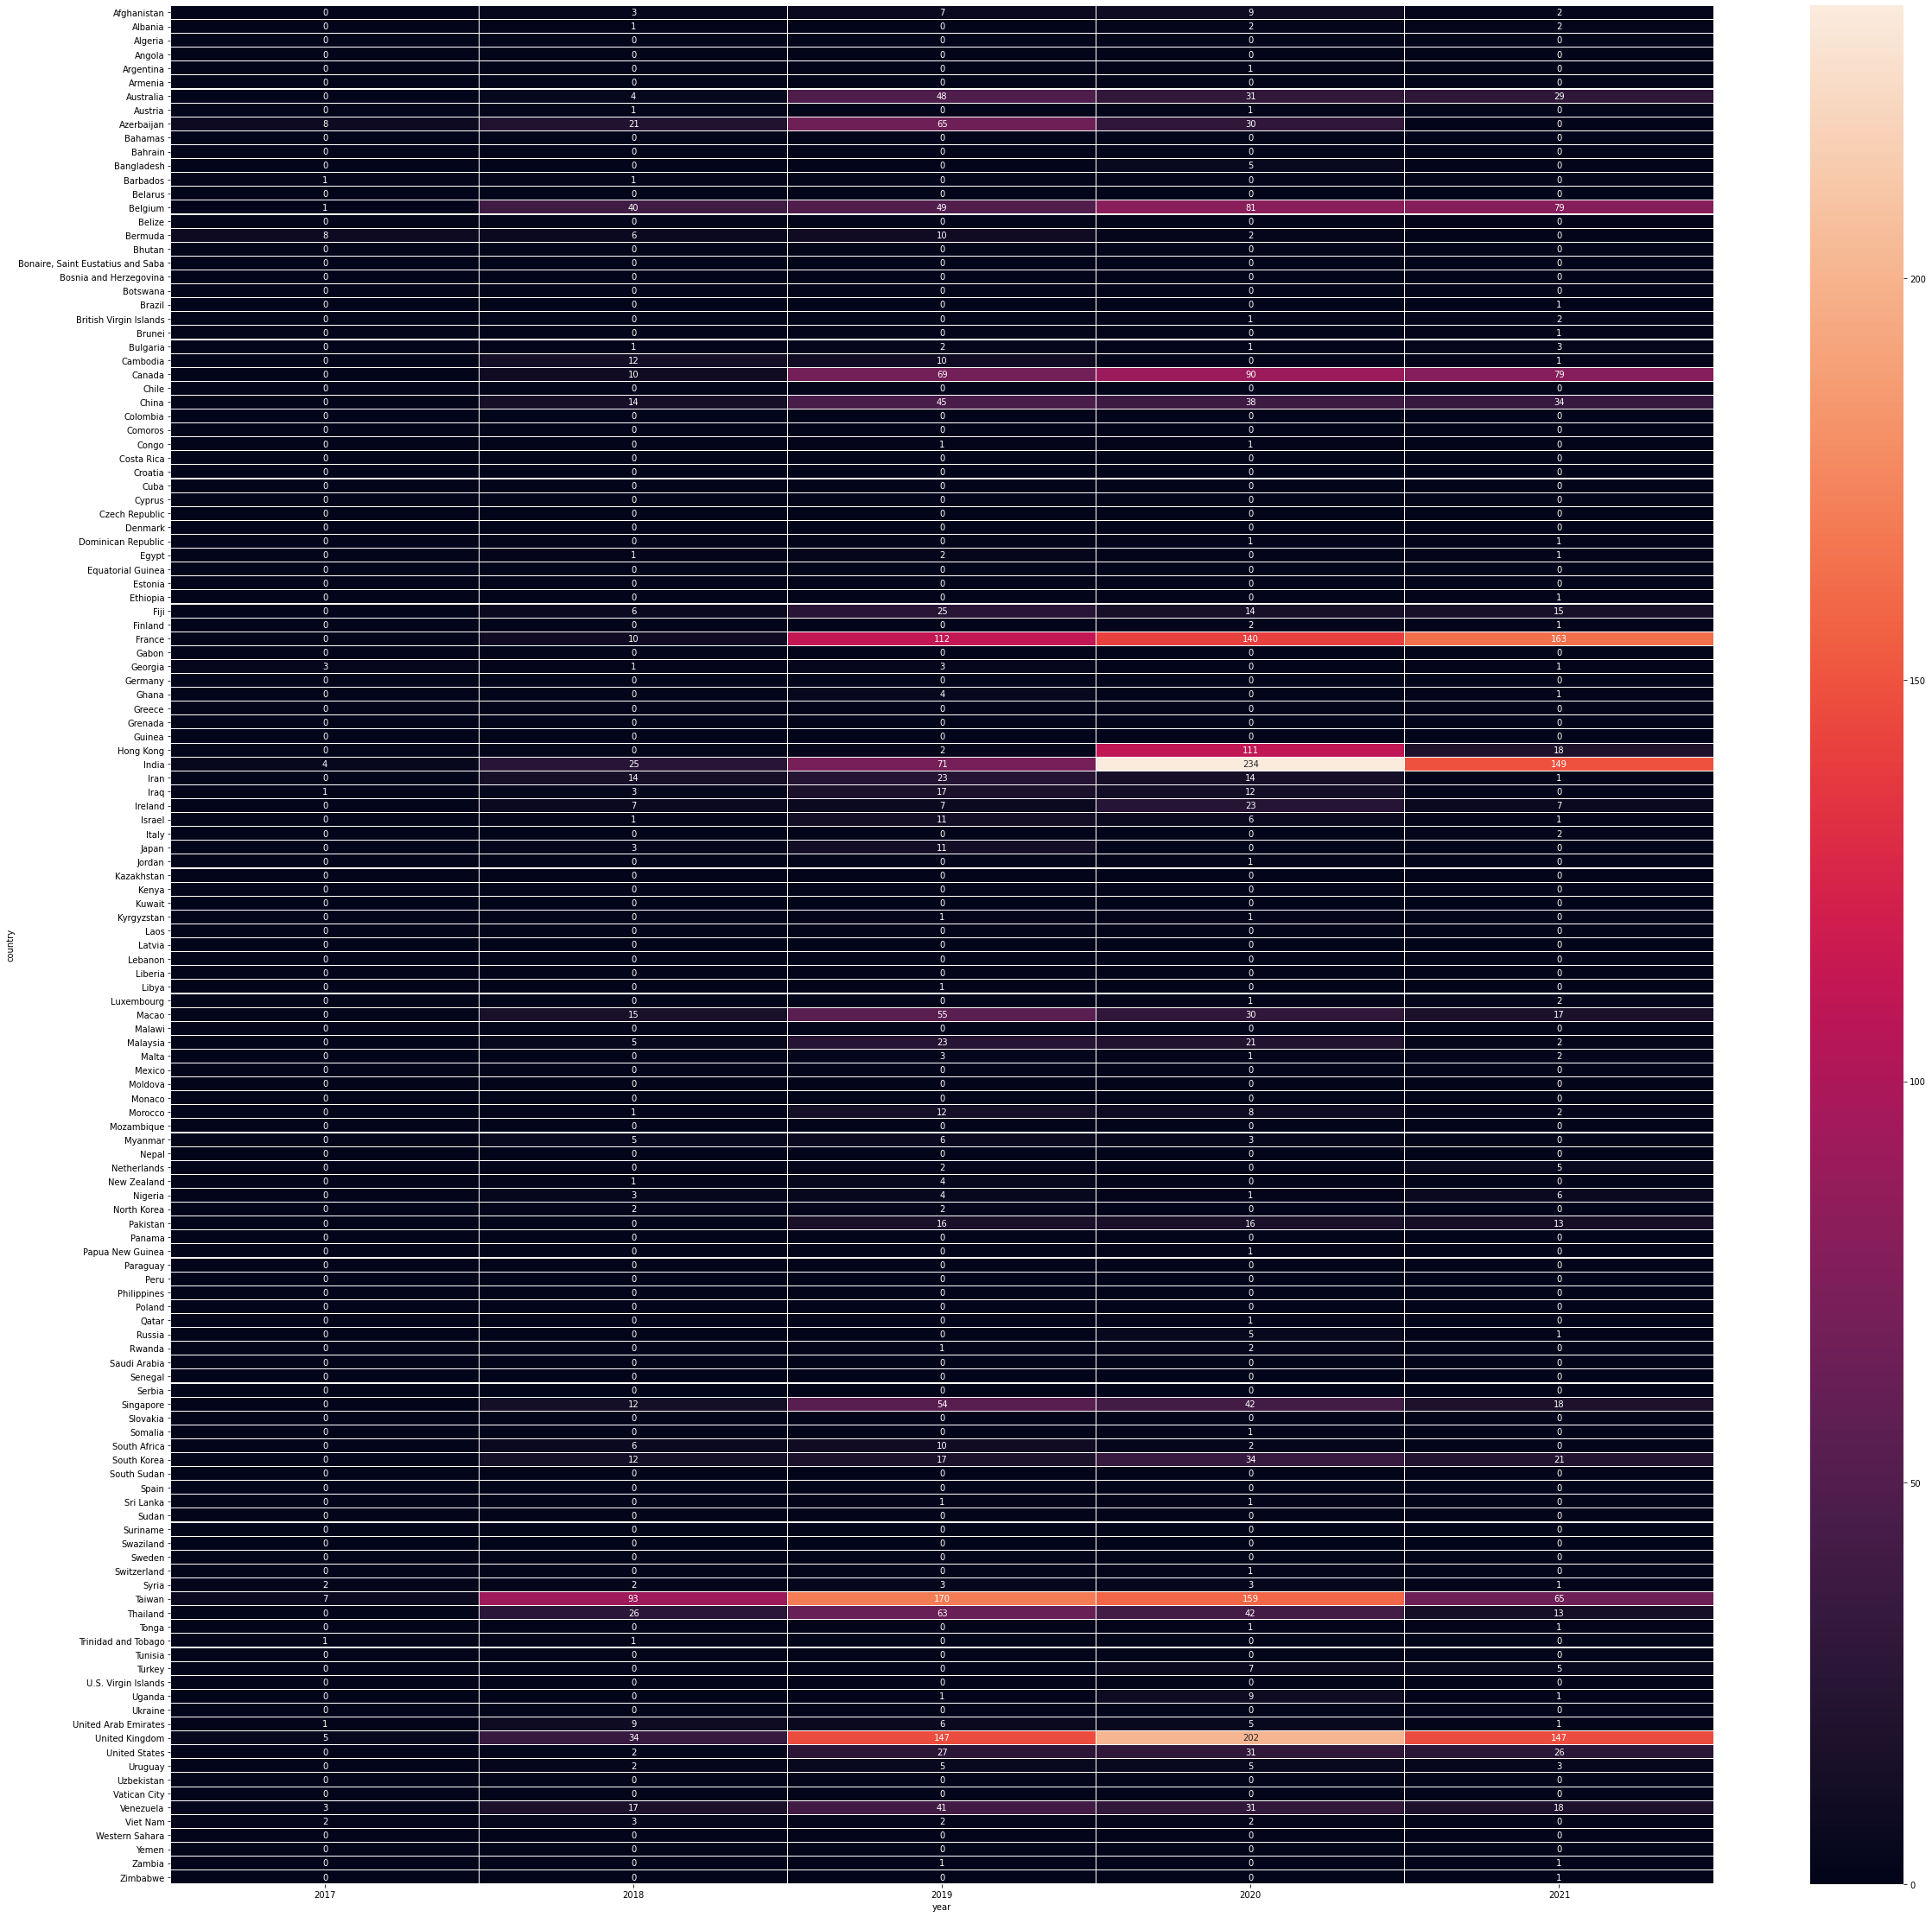

In [133]:
#Heatmap 1 

country_time = by_country_overtime.reset_index()
country_time = country_time.drop(columns="baseline_count")
country_time_heatmap1 = country_time.pivot("country", "year", "uyghur_count") 
plt.subplots(figsize=(40,40)) 
heatmap = sns.heatmap(country_time_heatmap1, linewidths=.1, annot=True, fmt="d")


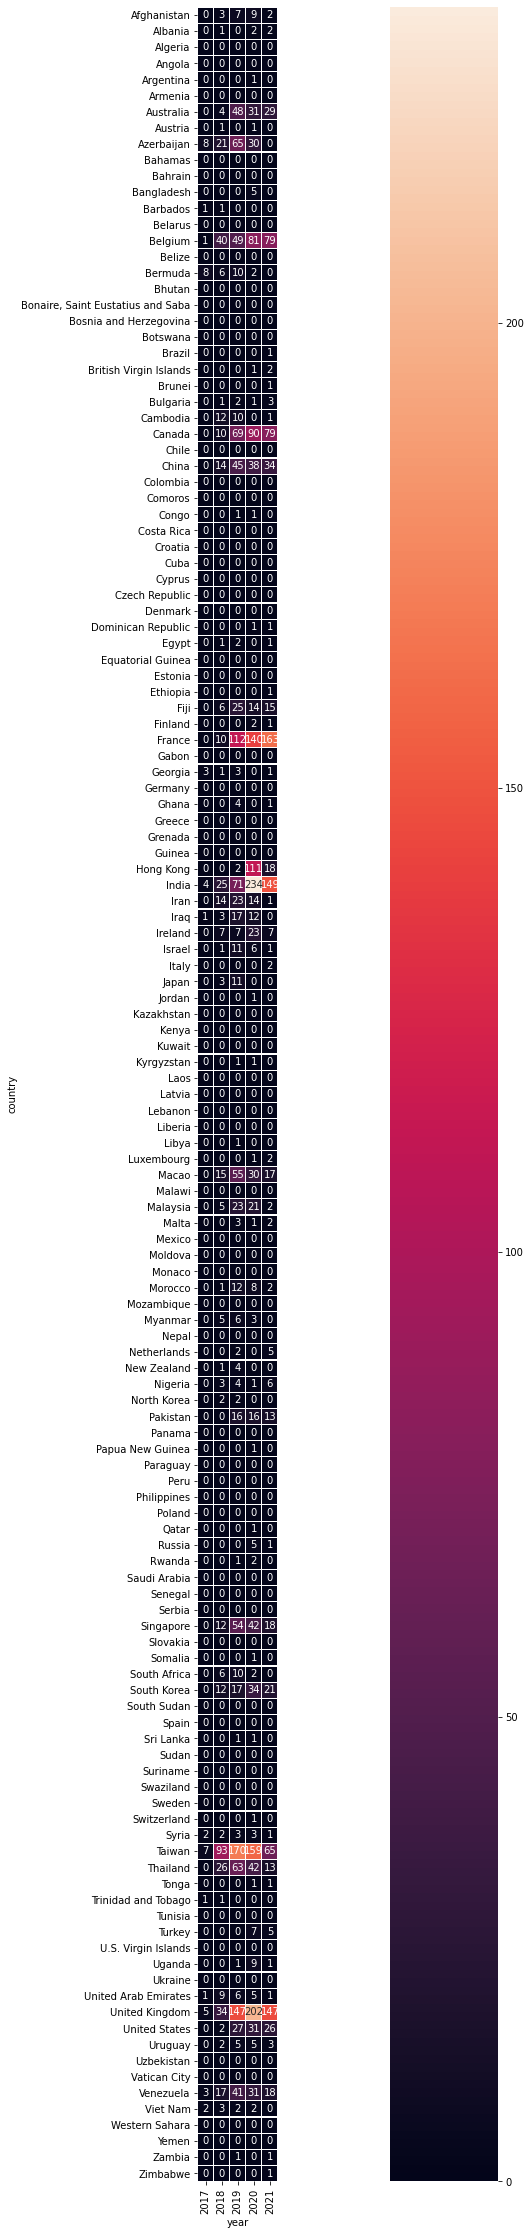

In [134]:
#Heatmap 2 

country_time = by_country_overtime.reset_index()
country_time = country_time.drop(columns="baseline_count") 
country_time_heatmap2 = country_time.pivot("country", "year", "uyghur_count")
plt.subplots(figsize=(40,40)) 
heatmap = sns.heatmap(country_time_heatmap2, linewidths=.1, annot=True, square=True, fmt="d")

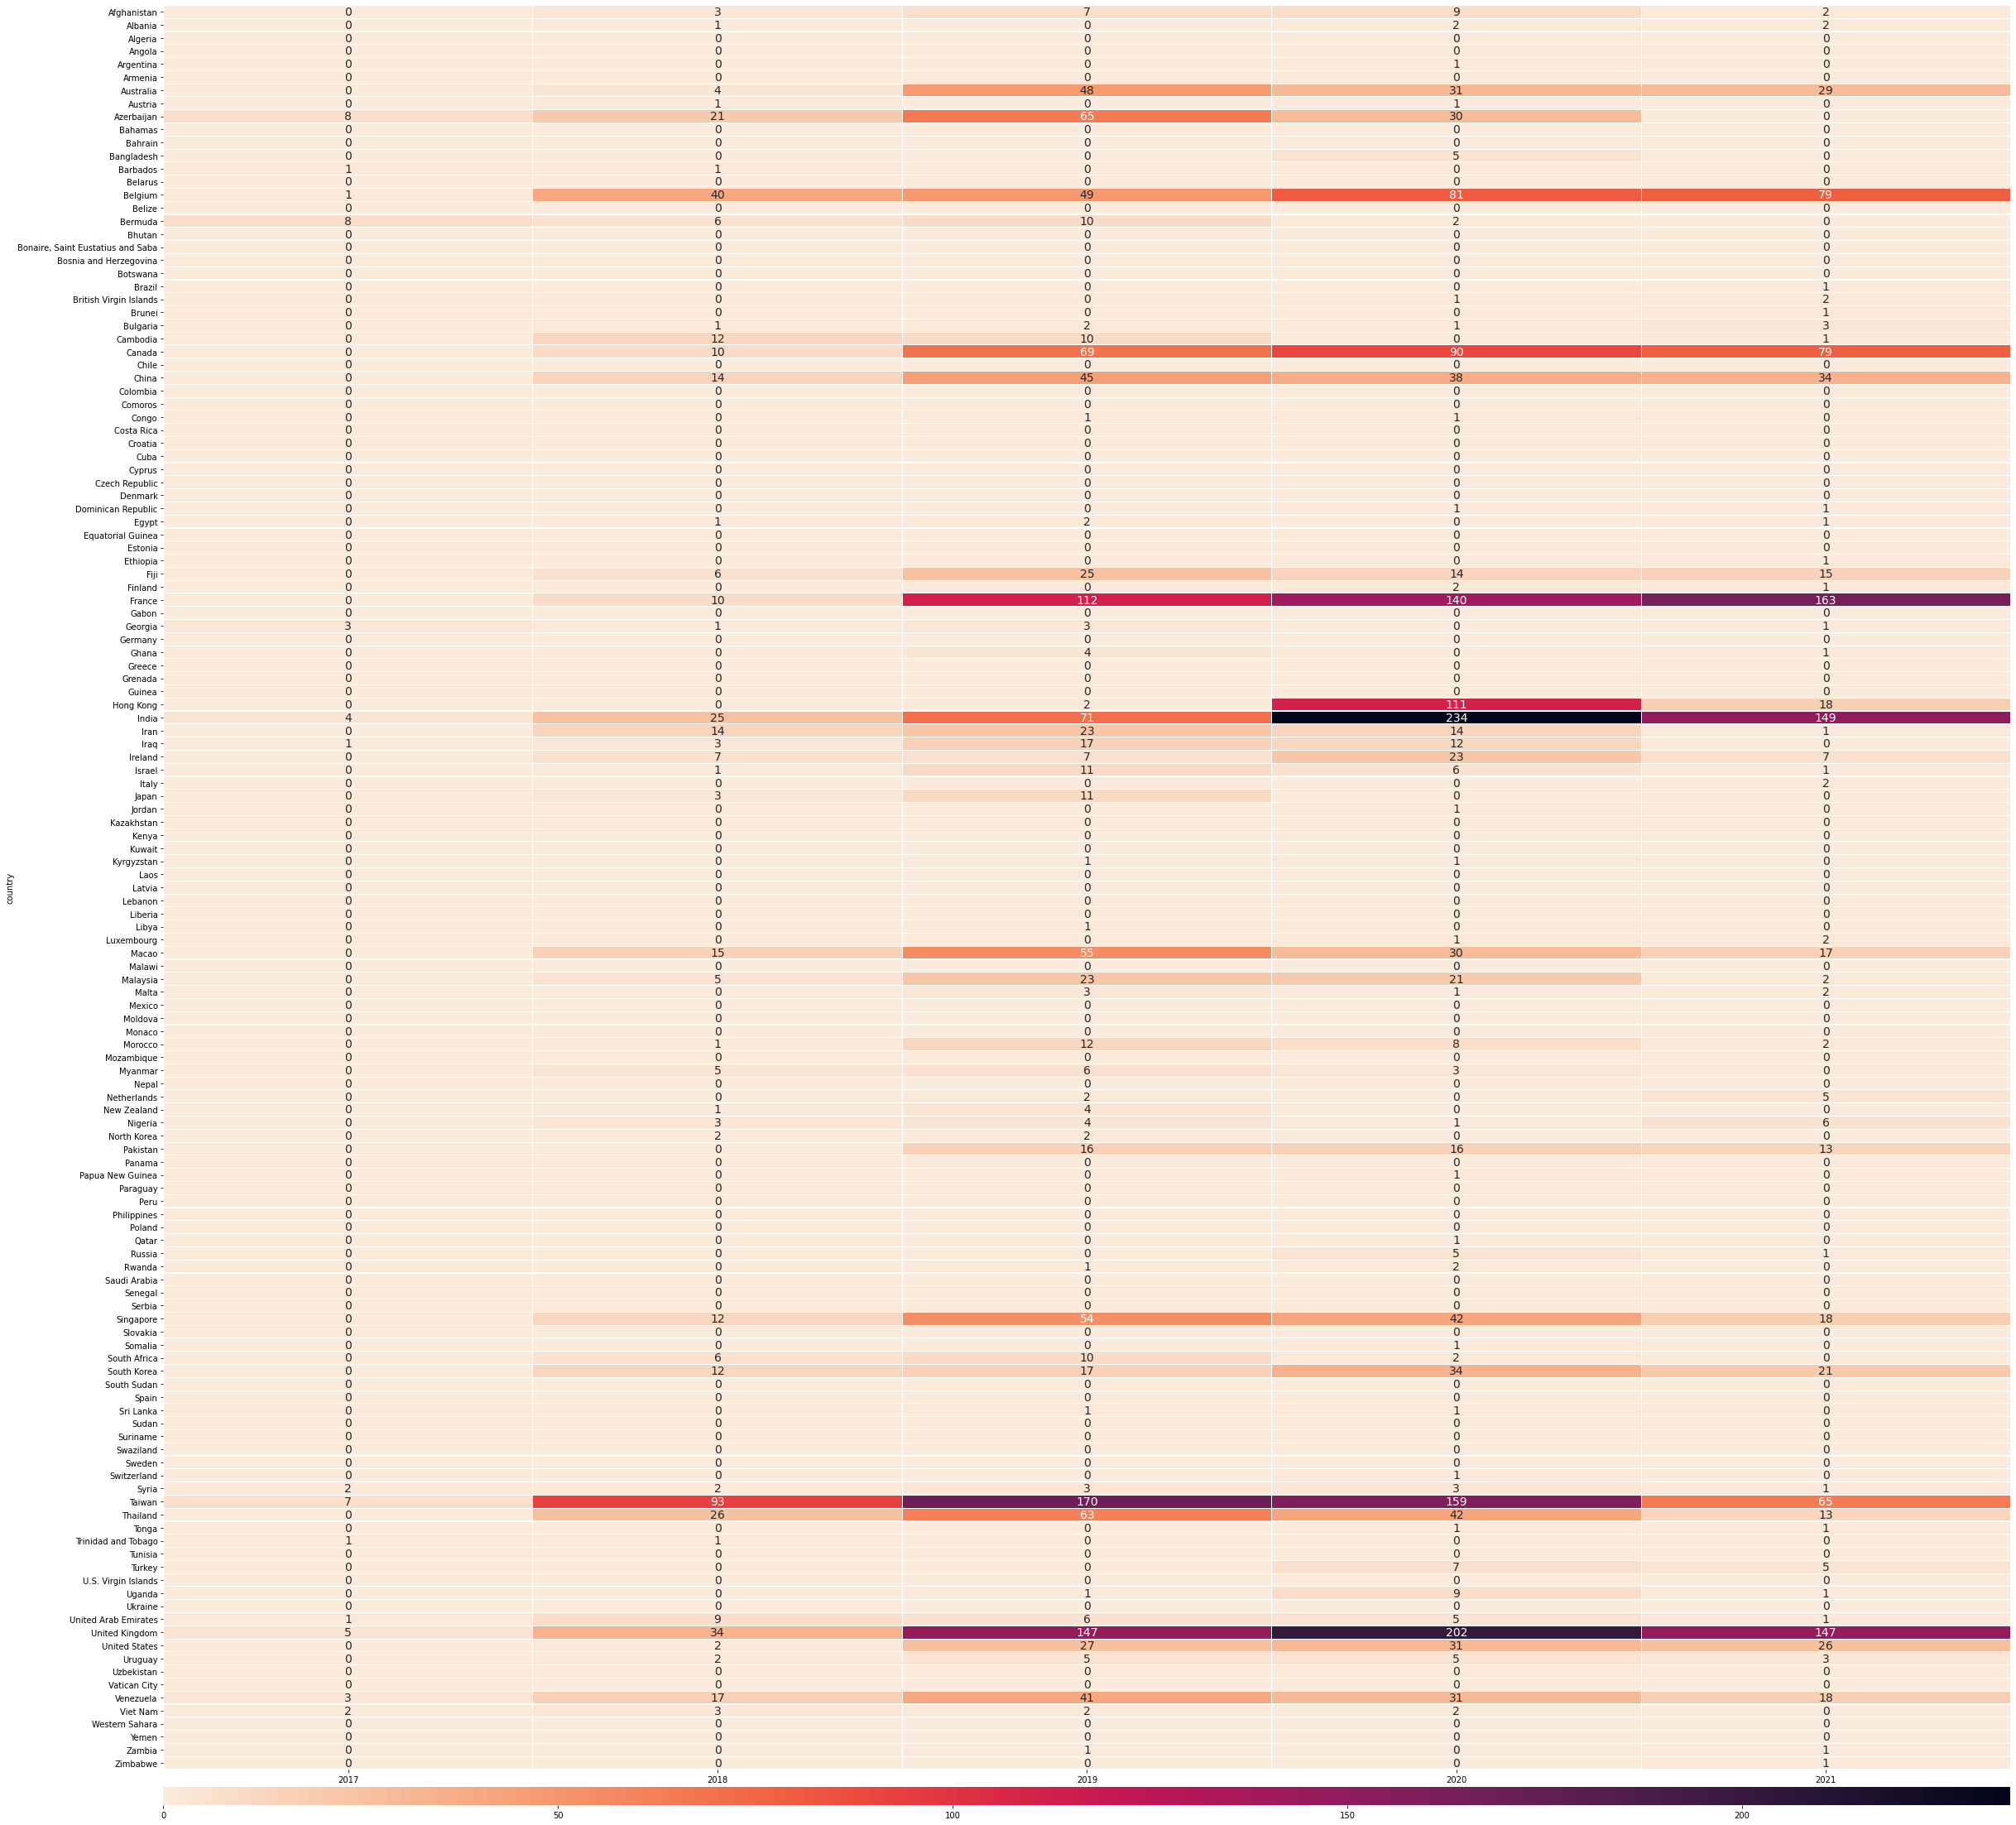

In [135]:
#Heatmap 3 (same as Heatmap 1 but the bar is horizontal)

#Insight 1: Iran, Iraq, Azerbaijan, Bermuda, Macao, Malaysia, Thailand, Venezuela - decreasing trend of mentions over time  

#Insight 2: Surprisingly India, whose China has good diplomatic relations, have mentioned relatively the same amount as places like 
#Canada, France, Hong Kong, Taiwan, UK, US 

country_time = by_country_overtime.reset_index()
country_time = country_time.drop(columns="baseline_count")
country_time_heatmap3 = country_time.pivot("country", "year", "uyghur_count")
country_time_heatmap3.sort_index(axis=0, ascending=True, inplace=True) 


grid_kws = {"height_ratios": (.2, .002), "hspace": .02}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(80,80))
cmap = sns.cm.rocket_r 
ax = sns.heatmap(country_time_heatmap3, ax=ax,
                 cbar_ax=cbar_ax, linewidths=.1, annot=True, fmt="d",annot_kws={"size": 14},
                 cbar_kws={"orientation": "horizontal"}, cmap = cmap) 

figsize = f.get_size_inches()
f.set_size_inches(figsize * .5) 

<AxesSubplot:xlabel='year'>

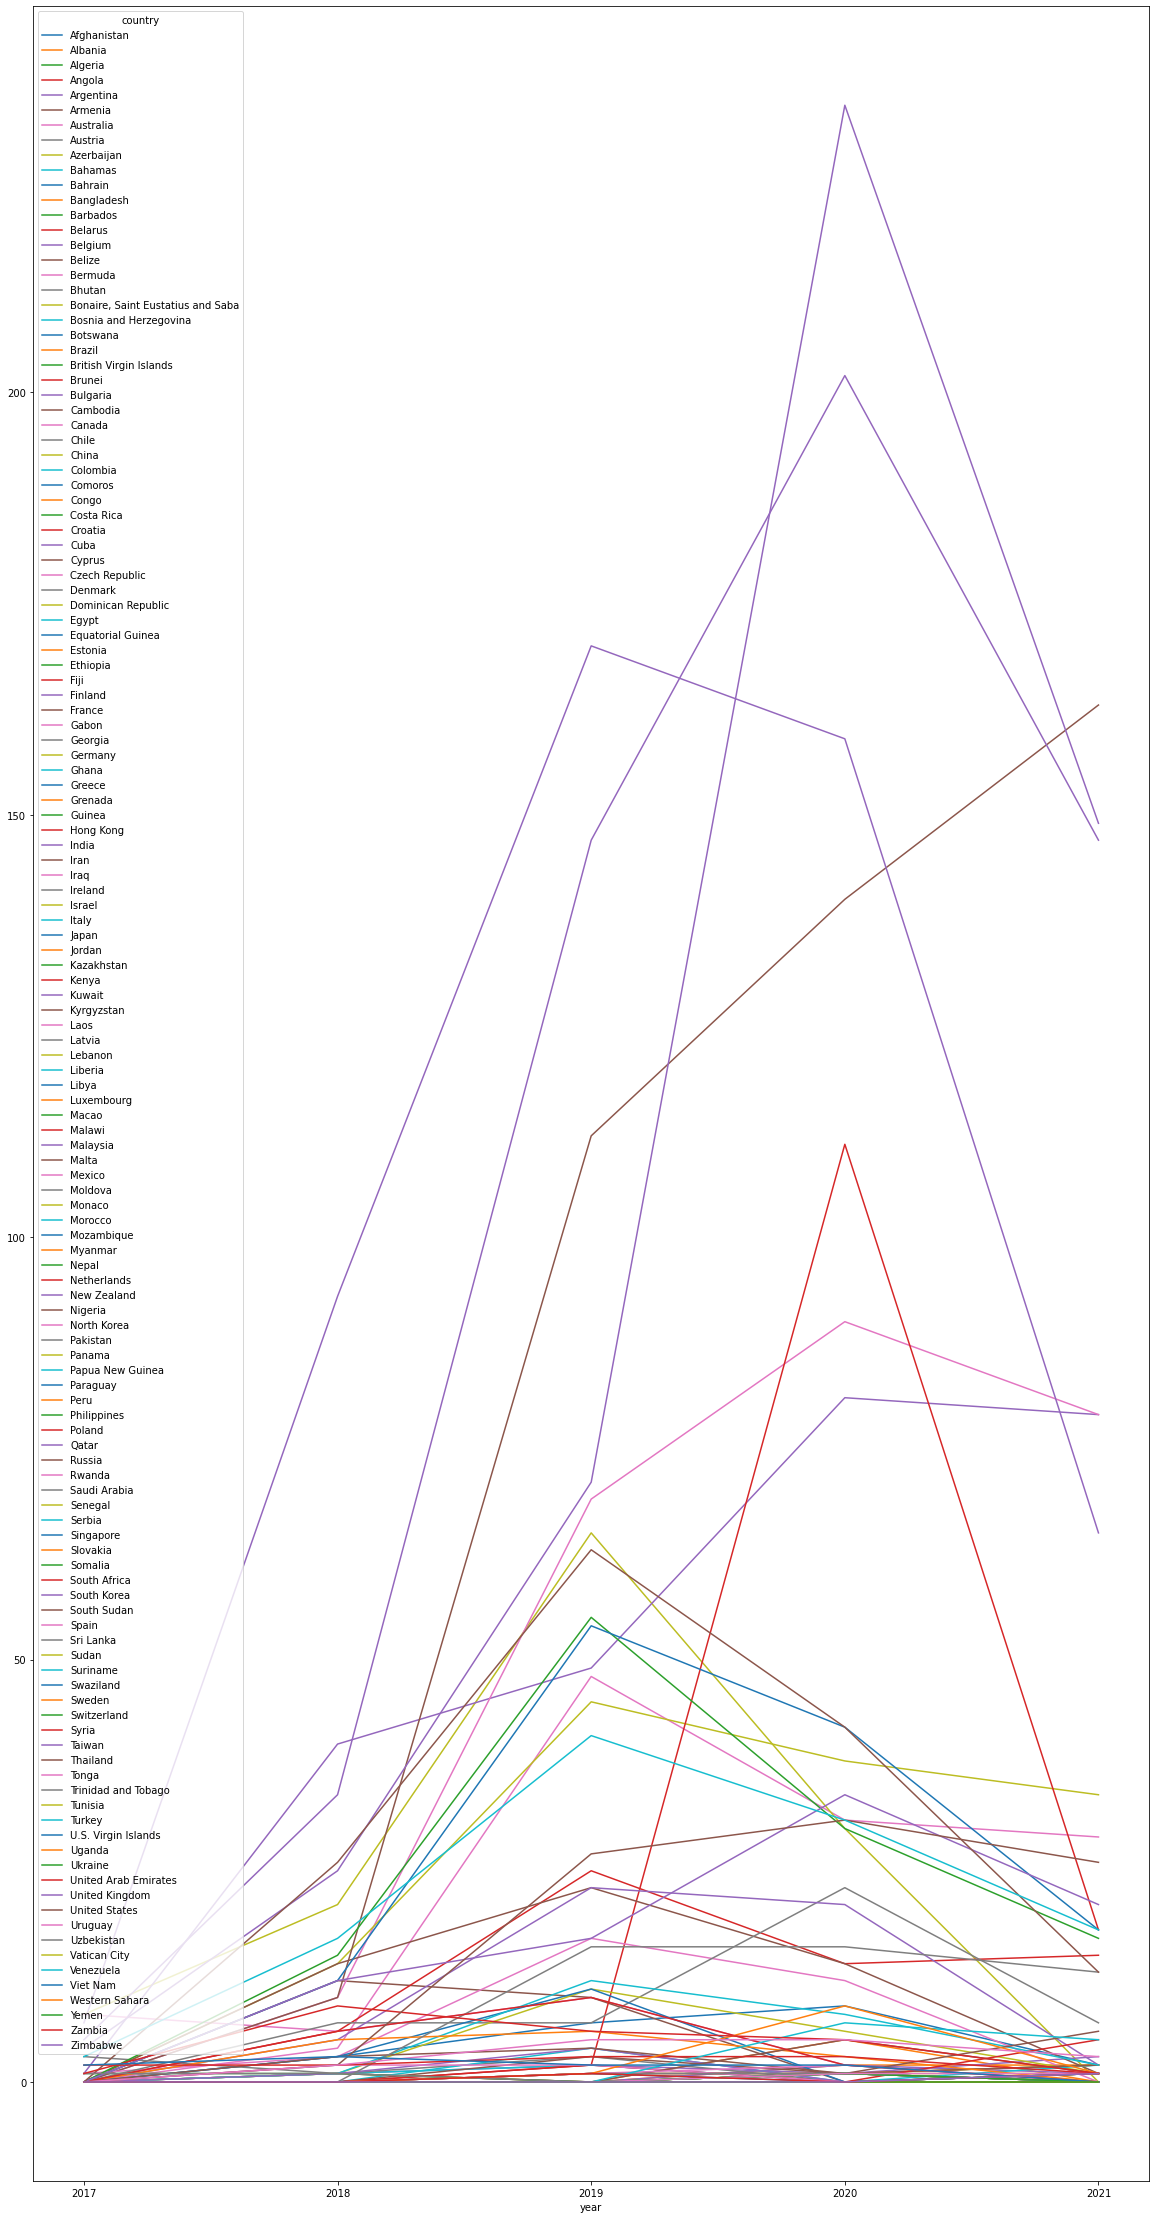

In [136]:
#Just to check graph 
fig, ax = plt.subplots()
ax.set_xticks(country_overtime.year.unique())
country_overtime.groupby(["year", "country"]).sum()['uyghur_count'].unstack().plot(ax=ax, figsize=(20, 40))

In [137]:
#TOTAL MEDIA MENTIONS BY COUNTRY FROM 2017-2021 (DATA CLEANING)

by_country = country_overtime.drop(columns=["baseline_count", "year"]).groupby('country').sum().sort_values('uyghur_count', ascending=True)
#top-50 
top50_a = by_country.head(50)
top50_a.reset_index()

,country,uyghur_count
0,Latvia,0
1,Cuba,0
2,Cyprus,0
3,Czech Republic,0
4,Denmark,0
5,Senegal,0
6,Saudi Arabia,0
7,Equatorial Guinea,0
8,Estonia,0
9,Poland,0


<AxesSubplot:title={'center':"Uyghurs' Media Mentions by Country from 2017-2021"}, ylabel='country'>

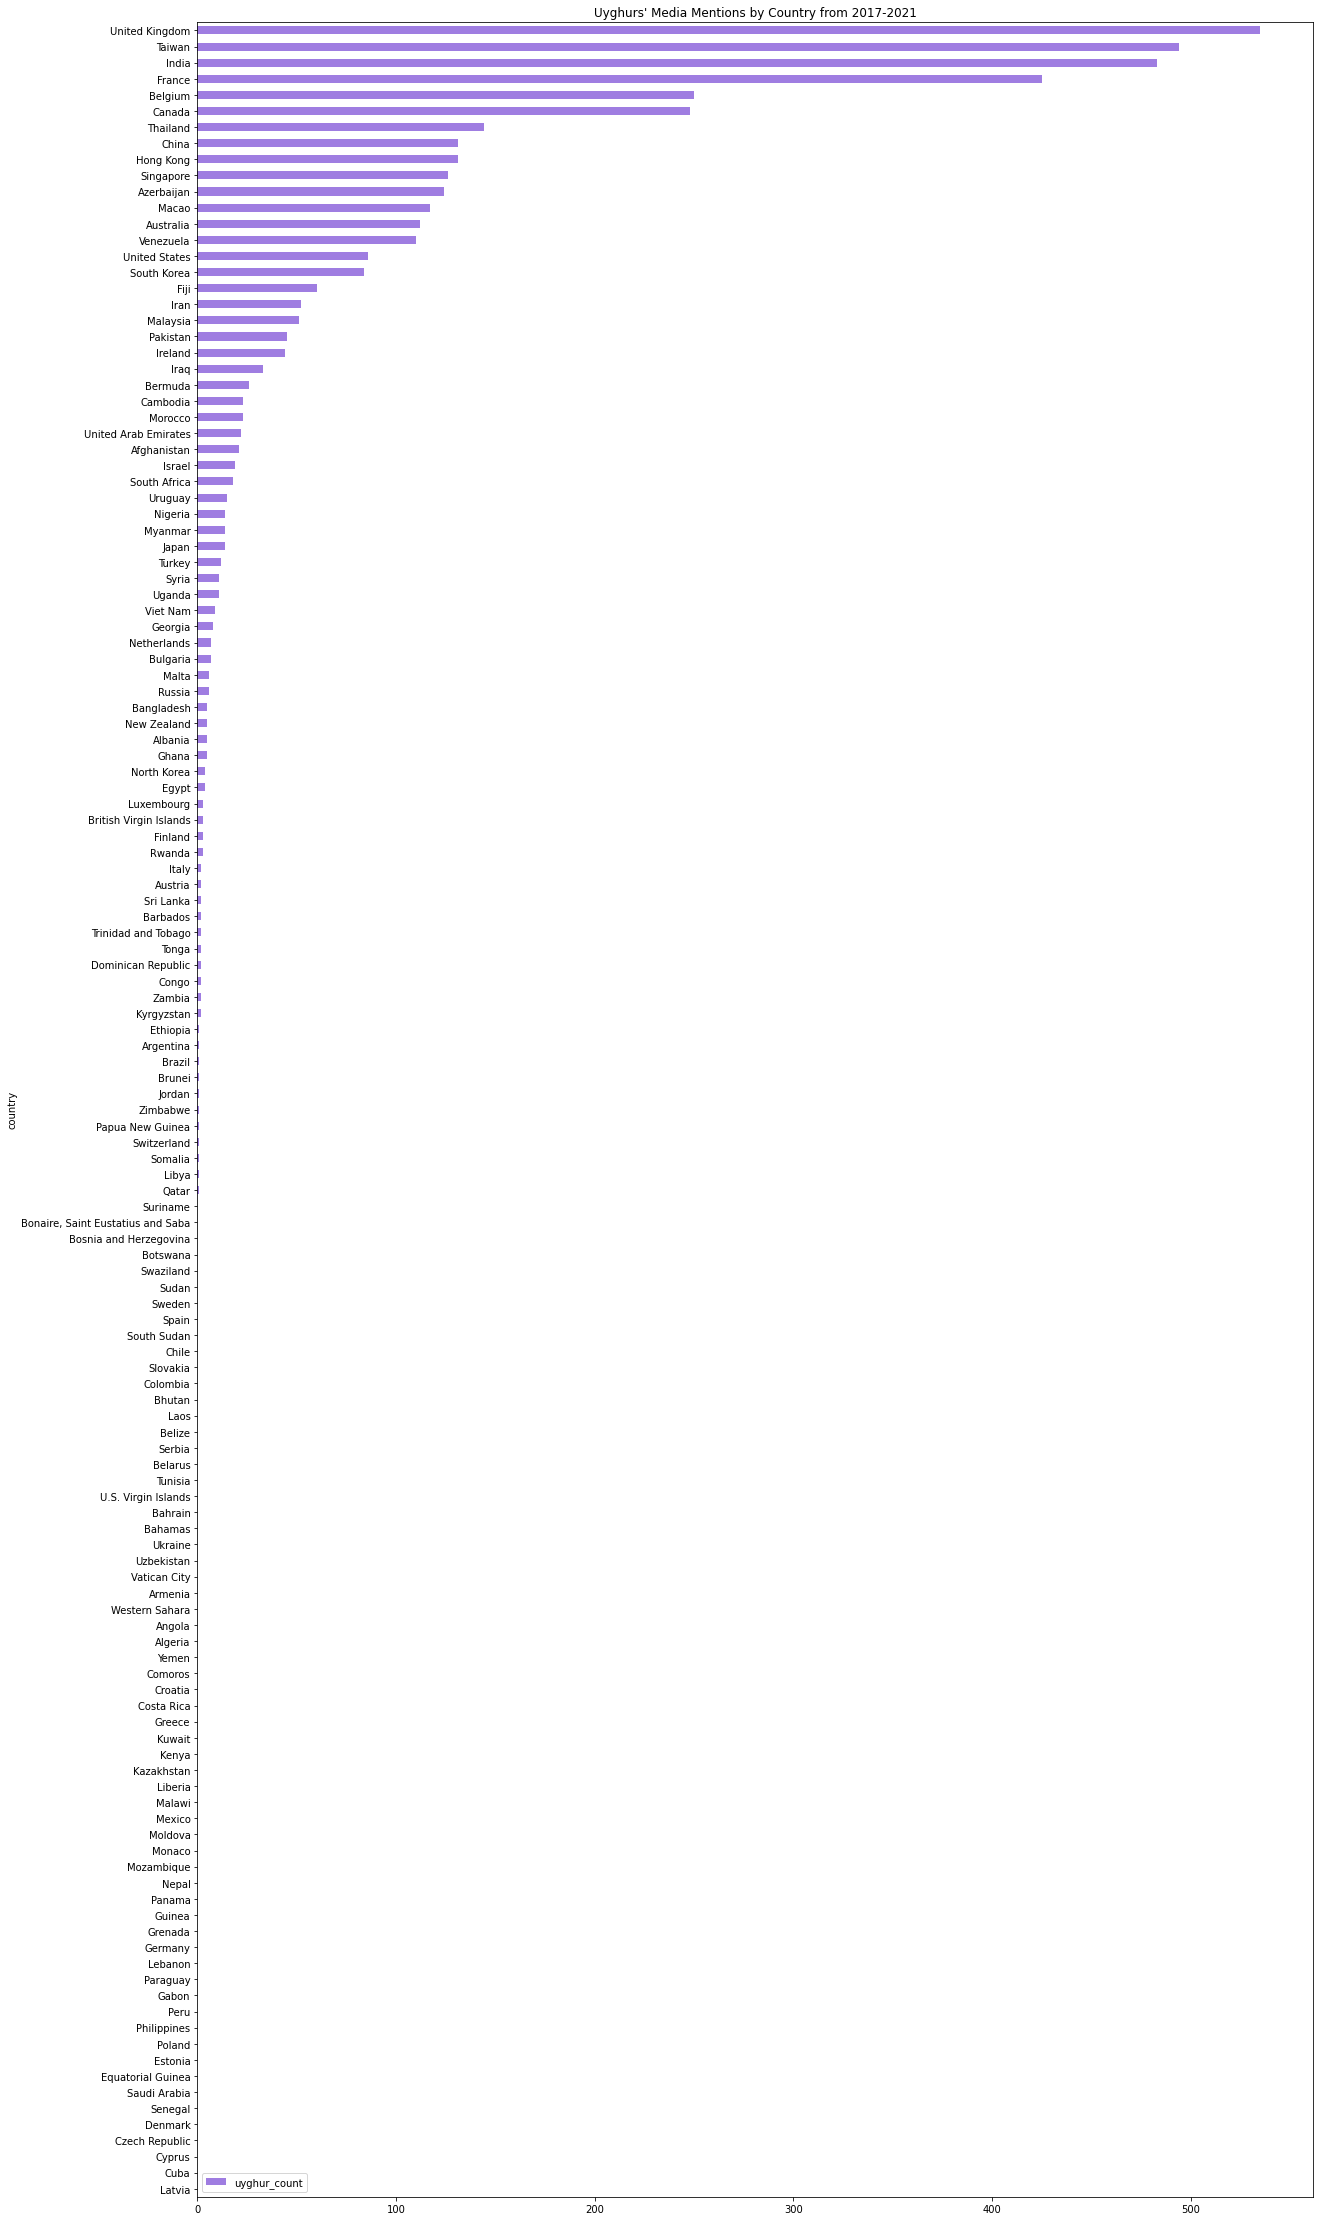

In [138]:
#TOTAL MEDIA MENTIONS BY COUNTRY FROM 2017-2021 (VISUALIZATION: HORIZONTAL BAR PLOT)

#Insight: Comparing to the source that list produced during the UN Human Rights Council and the U.N. High Commissioner for Human Rights 
#countries that are against / supporting China's policies and media mentions, we can see on this chart that both countries that 
#are claimed to be against and support policies have lots of media mentions of Uyghurs. Since we don't know the sentiment of those mentions, this insight makes total sense. 
#We can see more than 100 mentions from democracies and well-developed countries like UK, Belgium, France.  
#Interestingly Taiwan, Hong Kong, Iran, Iraq, Russia is also on this chart, considering China's relations with those countries.  

by_country.plot(kind='barh', figsize=(20, 40), title="Uyghurs' Media Mentions by Country from 2017-2021", color="#9F7DE1") 
 

In [139]:
by_country

,uyghur_count
country,
Latvia,0
Cuba,0
Cyprus,0
Czech Republic,0
Denmark,0
...,...
Belgium,250
France,425
India,483


In [140]:
#GLOBAL MENTIONS (DATA CLEANING)
#Insight: 2019-2020 produced the largest number of mentions 

global_mentions = country_overtime.groupby(["year"]).sum().sort_values("uyghur_count") 
global_mentions 

,baseline_count,uyghur_count
year,,
2017,376240,47
2018,988912,436
2021,350243,967
2019,1018067,1272
2020,1196539,1520


In [141]:
#GLOBAL MENTIONS (VISUALIZATION: BUBBLE CHARTS)

#Media in 20-30 Developed/Developing economies with mediacount bubble/country of mentions 
#(relative size) from 2017-2021 

#Example: UK 

uk_media = sources.loc[sources['country'] == "United Kingdom"] 
uk_media_group = uk_media.drop(columns=["year","id"]).groupby("display_name").sum().sort_values("uyghur_count",ascending=False)
uk_media_group

,baseline_count,uyghur_count
display_name,,
BBC,369156,279
The Daily Telegraph (London),155016,245
Sunday Herald,8706,11


In [142]:
#Example: Russia 

russia_media = sources.loc[sources['country'] == "Russia"] 
russia_media_group = russia_media.drop(columns=["year","id"]).groupby("display_name").sum().sort_values("uyghur_count",ascending=False)
russia_media_group

,baseline_count,uyghur_count
display_name,,
The Moscow Times,5151,6
Parlementskaya Gazeta,1,0
Russian Government News,7816,0


In [143]:
#ADDITIONAL FURTHER RESEARCH : COUNTRY-CHINA RELATIONSHIP 